EXP 5 : (H and E) vs S

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Without optimiser

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 677ms/step - accuracy: 0.6033 - loss: 376.6136 - val_accuracy: 0.6111 - val_loss: 44.4193
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 953ms/step - accuracy: 0.6438 - loss: 51.7477 - val_accuracy: 0.6111 - val_loss: 15.9793
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 612ms/step - accuracy: 0.7137 - loss: 11.3372 - val_accuracy: 0.6444 - val_loss: 5.1704
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 922ms/step - accuracy: 0.8054 - loss: 2.3803 - val_accuracy: 0.7333 - val_loss: 1.3131
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 673ms/step - accuracy: 0.8286 - loss: 1.0921 - val_accuracy: 0.7778 - val_loss: 0.7954
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 679ms/step - accuracy: 0.9006 - loss: 0.8481 - val_accuracy: 0.6444 - val_loss: 1.8394
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 945ms/step - accuracy: 0.8937 - loss: 0.4224 - val_accuracy: 0.8222 - val_loss: 0.5006
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 610ms/step - accuracy: 0.9562 - loss: 0.1606 - val_accuracy: 0.7444 - val

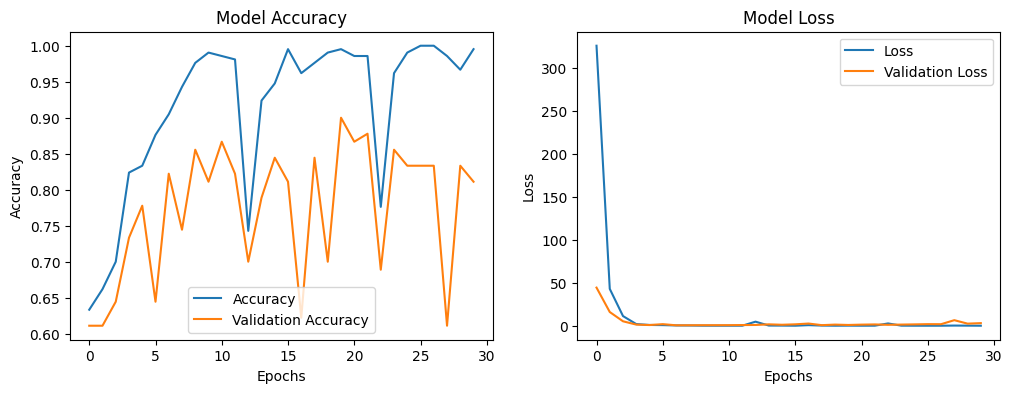

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Healthy = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy
path_Epileptic = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic
path_Seizure = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizure

# Load data
data_Healthy, labels_Healthy = load_data_from_directory(path_Healthy, label=0)  # Healthy (label 0)
data_Epileptic, labels_Epileptic = load_data_from_directory(path_Epileptic, label=1)  # Epileptic (label 1)
data_Seizure, labels_Seizure = load_data_from_directory(path_Seizure, label=1)  # Seizure (label 1)

# Combine data and labels for Healthy and Epileptic vs Seizure
if data_Healthy.size > 0 and data_Epileptic.size > 0 and data_Seizure.size > 0:
    data_all = np.concatenate((data_Healthy, data_Epileptic, data_Seizure), axis=0)
    labels_all = np.concatenate((labels_Healthy, labels_Epileptic, labels_Seizure), axis=0)

    # Modify labels: Healthy and Epileptic are 0, Seizure is 1
    labels_all = np.where(labels_all == 1, 1, 0)  # Seizure (1) vs Healthy and Epileptic (0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for Healthy + Epileptic, 1 for Seizure)
    ])

    # Compile the model without optimizer (no optimizer)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


With Standerscaler

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5459 - loss: 1.8981 - val_accuracy: 0.6111 - val_loss: 0.6653
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 751ms/step - accuracy: 0.7220 - loss: 0.4844 - val_accuracy: 0.7556 - val_loss: 0.4715
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 821ms/step - accuracy: 0.7247 - loss: 0.4363 - val_accuracy: 0.7333 - val_loss: 0.4735
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 609ms/step - accuracy: 0.8192 - loss: 0.3722 - val_accuracy: 0.7556 - val_loss: 0.4713
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 934ms/step - accuracy: 0.8167 - loss: 0.3765 - val_accuracy: 0.6778 - val_loss: 0.5906
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 743ms/step - accuracy: 0.8449 - loss: 0.3414 - val_accuracy: 0.6111 - val_loss: 0.8821
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 942ms/step - accuracy: 0.7382 - loss: 0.4848 - val_accuracy: 0.7444 - val_loss: 0.4914
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 605ms/step - accuracy: 0.9043 - loss: 0.2703 - val_accuracy: 0.7556 - val_loss: 

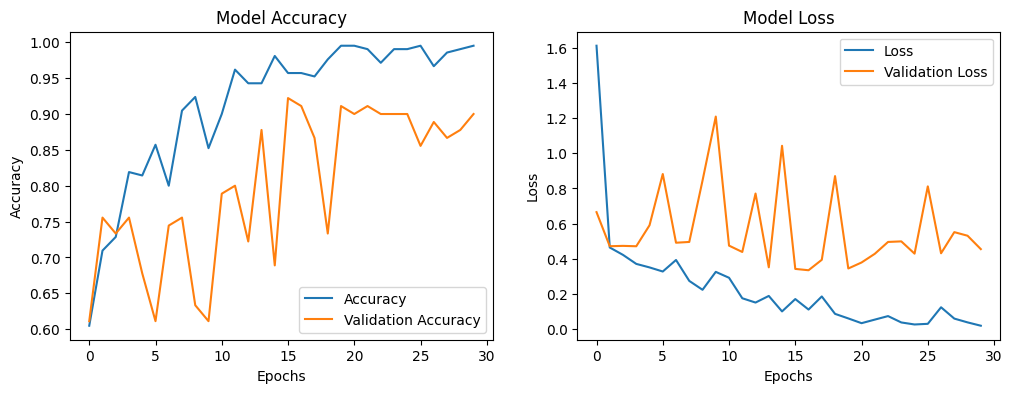

In [2]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Healthy = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy
path_Epileptic = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic
path_Seizure = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizure

# Load data
data_Healthy, labels_Healthy = load_data_from_directory(path_Healthy, label=0)  # Healthy (label 0)
data_Epileptic, labels_Epileptic = load_data_from_directory(path_Epileptic, label=1)  # Epileptic (label 1)
data_Seizure, labels_Seizure = load_data_from_directory(path_Seizure, label=1)  # Seizure (label 1)

# Combine data and labels for Healthy and Epileptic vs Seizure
if data_Healthy.size > 0 and data_Epileptic.size > 0 and data_Seizure.size > 0:
    data_all = np.concatenate((data_Healthy, data_Epileptic, data_Seizure), axis=0)
    labels_all = np.concatenate((labels_Healthy, labels_Epileptic, labels_Seizure), axis=0)

    # Modify labels: Healthy and Epileptic are 0, Seizure is 1
    labels_all = np.where(labels_all == 1, 1, 0)  # Seizure (1) vs Healthy and Epileptic (0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Normalize data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for Healthy + Epileptic, 1 for Seizure)
    ])

    # Compile the model without optimizer (no optimizer)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


With Optimiser

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 622ms/step - accuracy: 0.5676 - loss: 318.0063 - val_accuracy: 0.6111 - val_loss: 305.7375
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 678ms/step - accuracy: 0.6949 - loss: 156.2928 - val_accuracy: 0.6222 - val_loss: 13.2592
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 816ms/step - accuracy: 0.4457 - loss: 21.3571 - val_accuracy: 0.3889 - val_loss: 5.5151
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 636ms/step - accuracy: 0.4654 - loss: 3.2793 - val_accuracy: 0.6111 - val_loss: 0.6855
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 788ms/step - accuracy: 0.6779 - loss: 0.5856 - val_accuracy: 0.6111 - val_loss: 0.6739
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.7045 - loss: 0.6059 - val_accuracy: 0.6111 - val_loss: 0.5838
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 639ms/step - accuracy: 0.7683 - loss: 0.4998 - val_accuracy: 0.7667 - val_loss: 0.5368
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 917ms/step - accuracy: 0.8342 - loss: 0.4883 - val_accuracy: 0.7444 - v

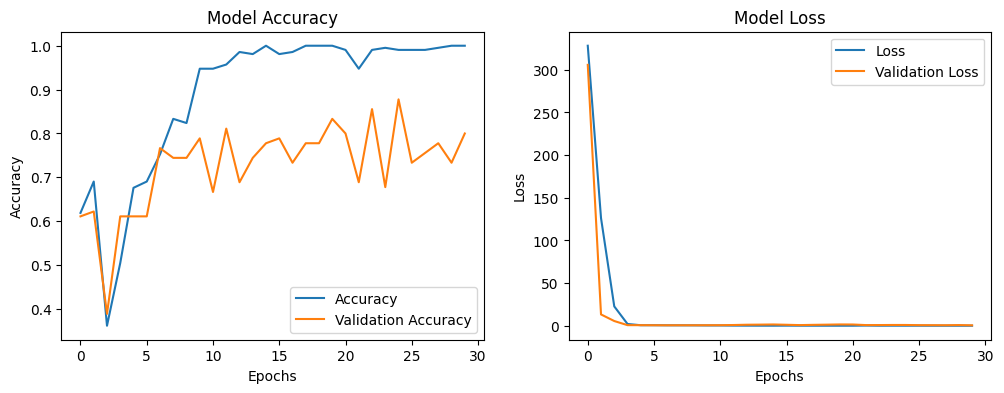

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Healthy = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy
path_Epileptic = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic
path_Seizure = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizure

# Load data
data_Healthy, labels_Healthy = load_data_from_directory(path_Healthy, label=0)  # Healthy (label 0)
data_Epileptic, labels_Epileptic = load_data_from_directory(path_Epileptic, label=1)  # Epileptic (label 1)
data_Seizure, labels_Seizure = load_data_from_directory(path_Seizure, label=1)  # Seizure (label 1)

# Combine data and labels for Healthy and Epileptic vs Seizure
if data_Healthy.size > 0 and data_Epileptic.size > 0 and data_Seizure.size > 0:
    data_all = np.concatenate((data_Healthy, data_Epileptic, data_Seizure), axis=0)
    labels_all = np.concatenate((labels_Healthy, labels_Epileptic, labels_Seizure), axis=0)

    # Modify labels: Healthy and Epileptic are 0, Seizure is 1
    labels_all = np.where(labels_all == 1, 1, 0)  # Seizure (1) vs Healthy and Epileptic (0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for Healthy + Epileptic, 1 for Seizure)
    ])

    # Compile the model with the Adam optimizer
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


with both op and standerscaler

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 655ms/step - accuracy: 0.5722 - loss: 1.2157 - val_accuracy: 0.6111 - val_loss: 0.5372
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 887ms/step - accuracy: 0.6938 - loss: 0.4529 - val_accuracy: 0.6444 - val_loss: 0.5148
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 608ms/step - accuracy: 0.7929 - loss: 0.4602 - val_accuracy: 0.6111 - val_loss: 0.5175
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 913ms/step - accuracy: 0.6592 - loss: 0.4476 - val_accuracy: 0.6667 - val_loss: 0.5085
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 611ms/step - accuracy: 0.7649 - loss: 0.3928 - val_accuracy: 0.7111 - val_loss: 0.5095
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 893ms/step - accuracy: 0.8280 - loss: 0.3712 - val_accuracy: 0.7333 - val_loss: 0.4971
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 600ms/step - accuracy: 0.8765 - loss: 0.3227 - val_accuracy: 0.7556 - val_loss: 0.4705
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 900ms/step - accuracy: 0.8569 - loss: 0.3061 - val_accuracy: 0.7778 - val_loss:

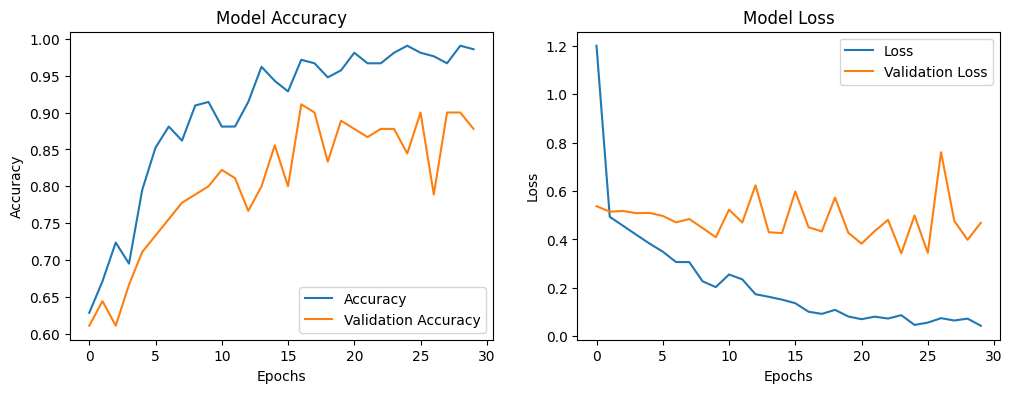

In [3]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for data standardization

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Healthy = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy
path_Seizure = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizure
path_Epileptic = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic

# Load data
data_Healthy, labels_Healthy = load_data_from_directory(path_Healthy, label=0)  # Healthy (label 0)
data_Seizure, labels_Seizure = load_data_from_directory(path_Seizure, label=1)  # Seizure (label 1)
data_Epileptic, labels_Epileptic = load_data_from_directory(path_Epileptic, label=1)  # Epileptic (label 1)

# Combine data and labels for Healthy vs (Seizure + Epileptic)
if data_Healthy.size > 0 and (data_Seizure.size > 0 or data_Epileptic.size > 0):
    data_all = np.concatenate((data_Healthy, data_Seizure, data_Epileptic), axis=0)
    labels_all = np.concatenate((labels_Healthy, labels_Seizure, labels_Epileptic), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for Healthy, 1 for Seizure/Epileptic)
    ])

    # Compile the model with Adam optimizer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")
